In [1]:
from lasagne import objectives
from lasagne import nonlinearities
from lasagne import updates
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify

In [2]:
import os
import pandas as pd
import cv2

In [3]:
# Creamos la función para abrir el set de imágenes (tienen que llamarse "clase"_"algo") y lo guardarlo como "faces.csv"

In [4]:
def images_to_file(path_to_photos):
    """ load images from folder and write a csv and return 
    a pd dataframe with X : Images and y:labels"""
    ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_photos)]
    df_out = pd.DataFrame(columns=['Image', 'Model', 'Model_enc'], index=ids)
    for image_file in os.listdir(path_to_photos):
            image = cv2.imread(os.path.join(path_to_photos, image_file), 0)
            df_out['Image'][os.path.splitext(image_file)[0]] = ' '.join(map(str, image.flatten()))
            df_out['Model'][os.path.splitext(image_file)[0]] = image_file.split('_')[0]
       
    catenc = pd.factorize(df_out['Model'])
    df_out['Model_enc'] = catenc[0]
    print(catenc)
    df_out.to_csv('../faces.csv')
    
    return df_out

In [5]:
images_to_file("../dataset IPDI/")

(array([0, 0, 0, ..., 2, 2, 2], dtype=int64), Index(['angry', 'happy', 'sad'], dtype='object'))


,Image,Model,Model_enc
angry_ (1),170 170 170 171 171 171 171 172 172 172 172 17...,angry,0
angry_ (10),164 164 165 166 167 167 168 168 169 169 169 17...,angry,0
angry_ (100),164 164 165 166 167 167 168 168 169 169 169 17...,angry,0
angry_ (101),163 164 164 165 166 167 167 168 169 169 169 17...,angry,0
angry_ (102),163 164 164 165 166 167 167 168 169 169 169 17...,angry,0
angry_ (103),163 163 164 165 166 167 168 168 169 170 170 17...,angry,0
angry_ (104),163 165 166 166 166 166 168 169 169 169 169 17...,angry,0
angry_ (105),164 164 165 166 167 167 168 168 169 169 169 17...,angry,0
angry_ (106),163 163 164 165 166 167 168 168 169 170 170 17...,angry,0
angry_ (107),163 163 164 165 166 167 168 168 169 169 169 17...,angry,0


In [6]:
import numpy as np
from sklearn.utils import shuffle

In [7]:
def load(images_dir="../dataset IPDI/", face_net_fn = '../faces.csv'):
    """Load images and target class for Angry, Happy and Sad faces."""
    
    if os.path.exists(face_net_fn):
        df = pd.read_csv(face_net_fn)
    else:
        df = images_to_file(images_dir)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.
    X = X.astype(np.float32)

    y = df['Model_enc'].values
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.int32)
    
    return X, y

In [8]:
import warnings; warnings.simplefilter('ignore')
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

In [9]:
layers_0 = [
    # layer dealing with the input data
    (InputLayer, {'shape': (None, 1, 128, 128)}),

    # first stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 5}),
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 3}),
    
    #Extra layer (pad con "same" no anda)
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 5, 'pad': 'full'}),
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 5}),
    #end extra layer
    
    (MaxPool2DLayer, {'pool_size': 2}),

    # second stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 32, 'filter_size': 3}),
    (Conv2DLayer, {'num_filters': 32, 'filter_size': 3}),
    
    #Extra layer (pad con "same" no anda)
    (Conv2DLayer, {'num_filters': 32, 'filter_size': 3, 'pad': 'full'}),
    (Conv2DLayer, {'num_filters': 32, 'filter_size': 3}),
    #end extra layer
    
    (MaxPool2DLayer, {'pool_size': 2}),

    # two dense layers with dropout
    (DenseLayer, {'num_units': 64}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 64}),

    # the output layer
    (DenseLayer, {'num_units': 3, 'nonlinearity': lasagne.nonlinearities.softmax}),
]


In [10]:
def create_net(max_epochs=100):
    return NeuralNet(
        layers=layers_0,
        update=nesterov_momentum,
        update_learning_rate=0.008,
        regression=False,
        objective_loss_function=categorical_crossentropy,
        #batch_iterator_train=BatchIterator(batch_size=256),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=max_epochs,
        verbose=1)

In [11]:
# Definir set de entrenamiento

In [12]:
from sklearn.cross_validation import train_test_split
x, y = load()
x = x.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape)

(952, 1, 128, 128)


In [13]:
# Crear y entrenar red

In [14]:
net = create_net(20)
net.fit(X_train, y_train)

# Neural Network with 1658003 learnable parameters

## Layer information

  #  name         size
---  -----------  ----------
  0  input0       1x128x128
  1  conv2d1      16x124x124
  2  conv2d2      16x122x122
  3  conv2d3      16x126x126
  4  conv2d4      16x122x122
  5  maxpool2d5   16x61x61
  6  conv2d6      32x59x59
  7  conv2d7      32x57x57
  8  conv2d8      32x59x59
  9  conv2d9      32x57x57
 10  maxpool2d10  32x28x28
 11  dense11      64
 12  dropout12    64
 13  dense13      64
 14  dense14      3

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -------
      1     1.09593     1.09046    1.00502      0.49479  488.23s
      2     1.08778     1.07781    1.00925      0.52083  487.80s
      3     1.06861     1.03900    1.02849      0.54167  487.21s
      4     1.00574     0.98327    1.02285      0.52083  487.58s
      5     0.91803     0.50445    1.81985      0.83854  487.39s
      6     0.91632     0.72085  

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x000000A4ABD41B70>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x000000A4ABD41B38>,
     check_input=True, custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 128, 128)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'num_filters': 16, 'filter_size': 5}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'num_filters': 16, 'filter_size': 3}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'n...ers.dense.DenseLayer'>, {'num_units': 3, 'nonlinearity': <function softmax at 0x000000A4A8510730>})],
     loss=None, max_epochs=20, more_params={},
     objective=<function objective at 0x000000A4ABE757B8>,
     objective_loss_function=<function categorical_crossentropy at 0x000000A4A83A1510>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x000000A4B02FFF98>],
     on_training_fin

In [23]:
# Mostrar errores de clasif. durante entrenamiento y post-entrenamiento

In [15]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

In [16]:
print(classification_report(y_test, net.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        78
          1       1.00      0.98      0.99        98
          2       0.97      1.00      0.98        63

avg / total       0.99      0.99      0.99       239



In [17]:
accuracy_score(y_test, net.predict(X_test))

0.99163179916317989

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

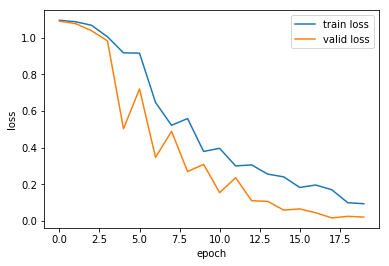

In [19]:
visualize.plot_loss(net)

In [20]:
def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
   
    plt.clf()
    
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    cm_normalized[np.isnan(cm_normalized)] = 0.0
    print(cm_normalized)
    plt.tick_params(labelsize=20)

    ax = plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    cb = plt.colorbar()
    cb.ax.tick_params(axis='both', labelsize=20)
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.xticks(range(3),range(3))
    plt.yticks(range(3),range(3))
    
    return ax


Normalized confusion matrix
[[ 1.          0.          0.        ]
 [ 0.          0.97959184  0.02040816]
 [ 0.          0.          1.        ]]
[[78  0  0]
 [ 0 96  2]
 [ 0  0 63]]


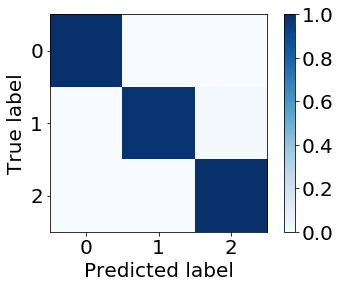

In [21]:
plot_matrix(net, X_test, y_test)
print(confusion_matrix(y_test, net.predict(X_test)))

In [30]:
# Guardar red

In [22]:
import pickle

In [23]:
with open('../data/face_classifier_big.pickle', 'wb') as f:
        pickle.dump(net, f, -1)

In [33]:
# Cargar red

In [24]:
net2 = None
with open('../data/face_classifier_big.pickle', 'rb') as f:
       net2 = pickle.load(f)

In [35]:
# Mostrar datos de red cargada

In [25]:
from nolearn.lasagne import PrintLayerInfo
layer_info = PrintLayerInfo()

net.verbose = 1
net.initialize()
layer_info(net2)

# Neural Network with 1658003 learnable parameters

## Layer information

  #  name         size
---  -----------  ----------
  0  input0       1x128x128
  1  conv2d1      16x124x124
  2  conv2d2      16x122x122
  3  conv2d3      16x126x126
  4  conv2d4      16x122x122
  5  maxpool2d5   16x61x61
  6  conv2d6      32x59x59
  7  conv2d7      32x57x57
  8  conv2d8      32x59x59
  9  conv2d9      32x57x57
 10  maxpool2d10  32x28x28
 11  dense11      64
 12  dropout12    64
 13  dense13      64
 14  dense14      3



In [37]:
# Cargar imagen

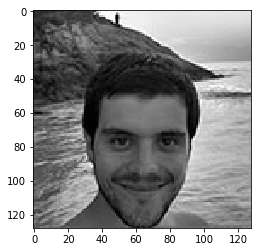

In [26]:
my_image = cv2.imread("../happyyy.jpg", 0)
plt.imshow(my_image, cmap='gray')
X = np.vstack(my_image) / 255.
plt.imshow(X, cmap='gray')
X = X.astype(np.float32)
X = X.reshape(-1, 1, 128, 128)

In [39]:
# Clasificar imagen

In [27]:
net2.predict(X)

array([1], dtype=int64)

In [28]:
proba = net2.predict_proba(X)
proba, proba.sum()

(array([[  1.24255588e-11,   9.99990826e-01,   9.17369317e-06]]), 1.0)